In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
# Load the data using pandas
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Splitting the data into input values and target values
x = train_data.drop(columns=['label']).values
y_train = train_data['label'].values

# Reshaping (-1, 28, 28, 1): -1 so the array can be calculated with the rest of the dimensions
# The 28, 28 refers to the height and width of the images (28 px)
# 1 is the number of channels, which is one since its grayscale
x_train = x.reshape(-1, 28, 28, 1) / 255.0 # For normalizing, we divide by 255 since pixels range from 0 - 255 but we want it to be from 0 to 1
x_test = test_data.values
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Printing the number of images in the training set and test set
print('Number of images within the training set: ', x_train.shape[0])
print('Number of images within the test set: ', x_test.shape[0])

Number of images within the training set:  42000
Number of images within the test set:  28000


875/875 [==============================] - 17s 20ms/step


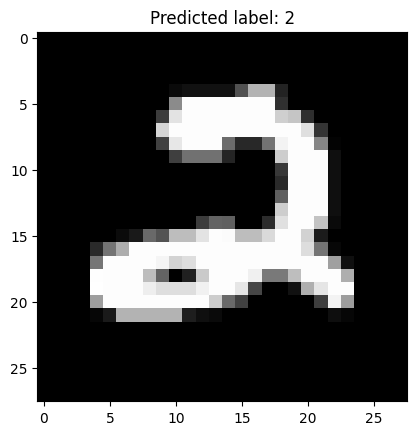

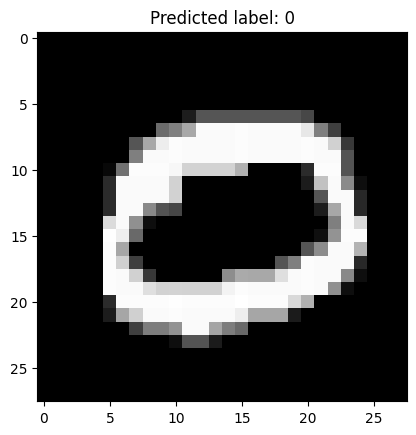

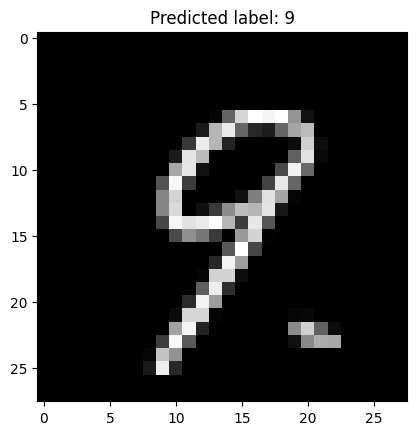

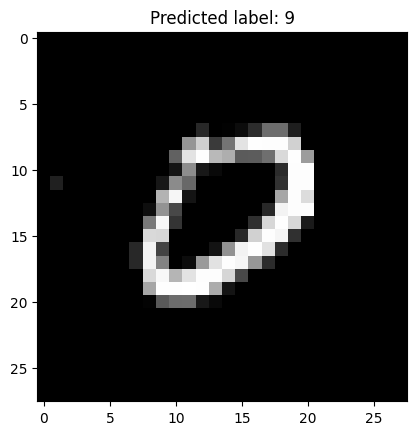

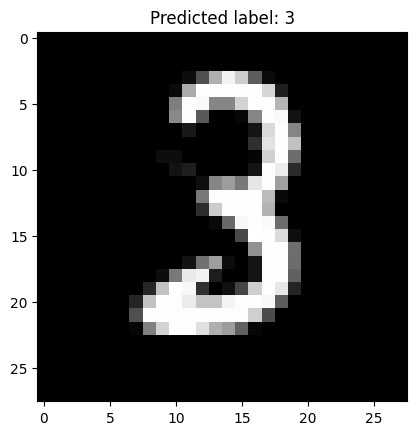

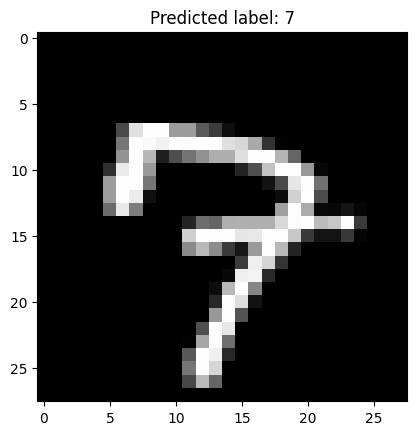

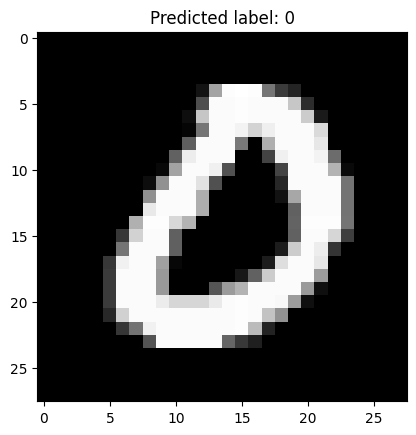

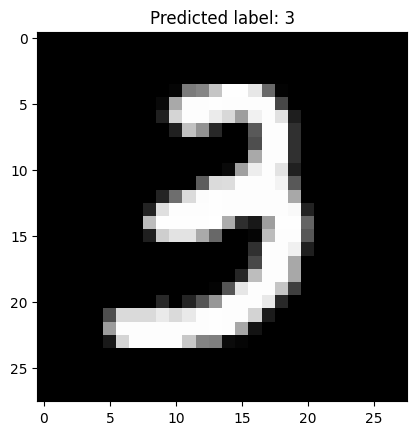

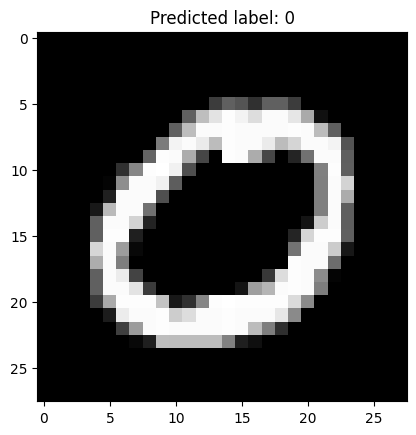

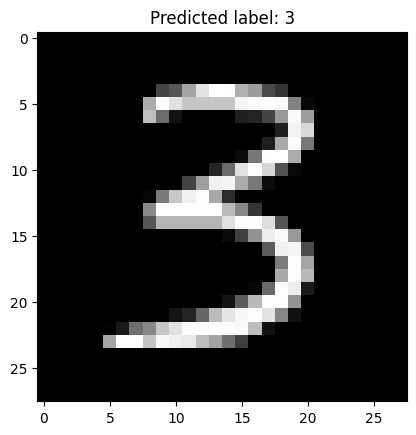

In [ ]:
# Flattening the data for SVM since it can't handle multidimensional data
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Training SVM
svm_classifier = svm.SVC()
svm_classifier.fit(x_train_flattened, y_train)

# To do predictions with SVM with the test data
svm_predict = svm_classifier.predict(x_test_flattened)
cnn_predict = model.predict(x_test)

# Displaying the images with the predicted labels
for i in range(10):
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f'Predicted label: {svm_predict[i]}')
  plt.show()

Epoch 1/10
1313/1313 [==============================] - 98s 74ms/step - loss: 0.1676 - accuracy: 0.9480
Epoch 2/10
1313/1313 [==============================] - 97s 74ms/step - loss: 0.0709 - accuracy: 0.9776
Epoch 3/10
1313/1313 [==============================] - 102s 78ms/step - loss: 0.0570 - accuracy: 0.9829
Epoch 4/10
1313/1313 [==============================] - 104s 79ms/step - loss: 0.0496 - accuracy: 0.9853
Epoch 5/10
1313/1313 [==============================] - 98s 75ms/step - loss: 0.0466 - accuracy: 0.9856
Epoch 6/10
1313/1313 [==============================] - 98s 75ms/step - loss: 0.0385 - accuracy: 0.9884
Epoch 7/10
1313/1313 [==============================] - 100s 76ms/step - loss: 0.0367 - accuracy: 0.9885
Epoch 8/10
1313/1313 [==============================] - 99s 75ms/step - loss: 0.0364 - accuracy: 0.9888
Epoch 9/10
1313/1313 [==============================] - 97s 74ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 10/10
1313/1313 [==============================] - 98s 

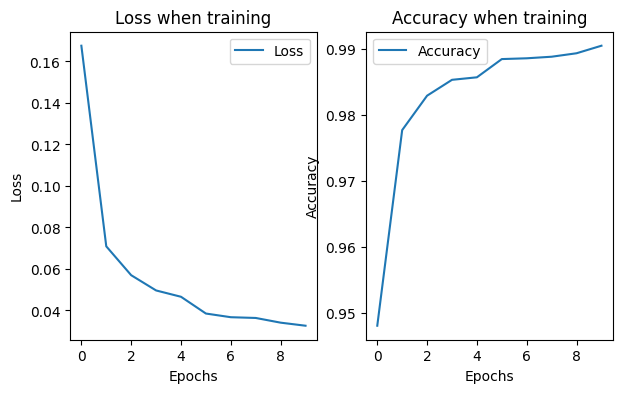

875/875 [==============================] - 18s 20ms/step


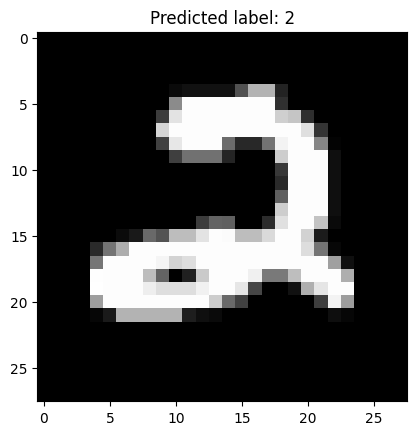

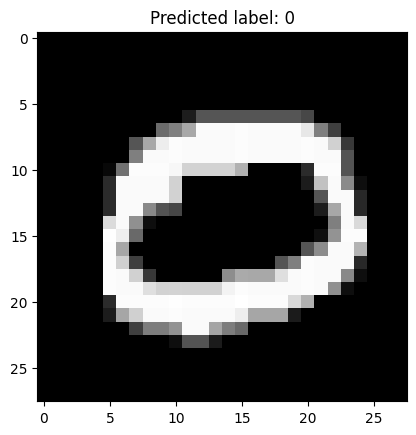

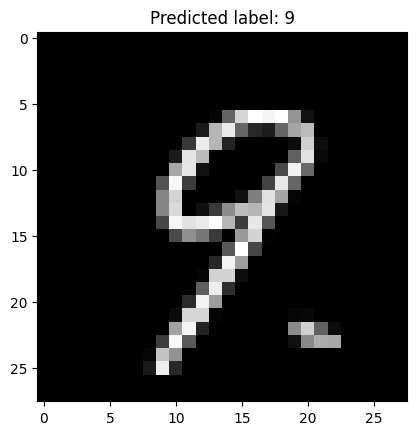

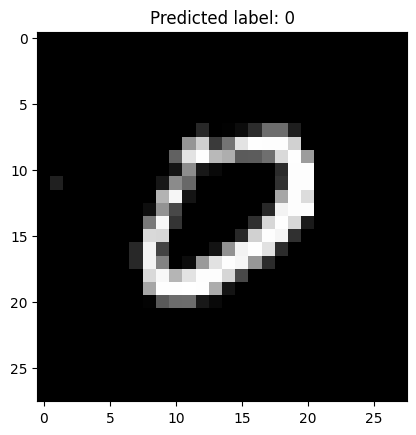

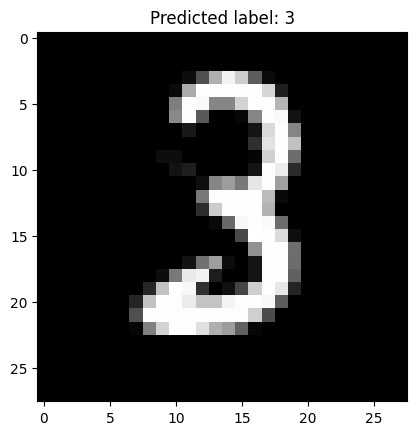

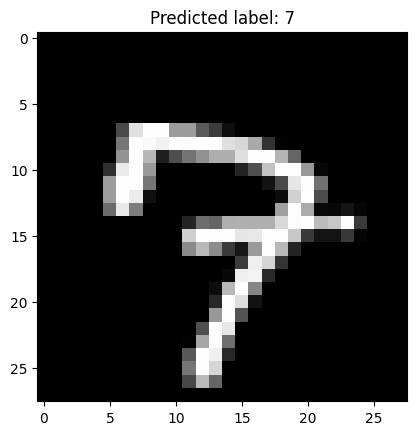

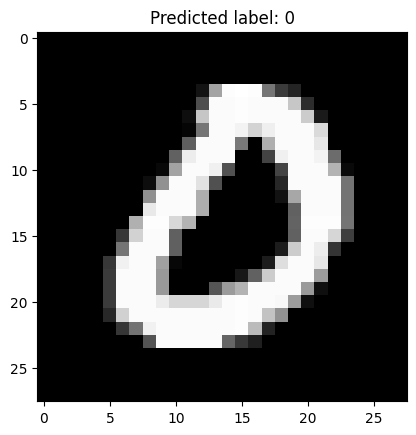

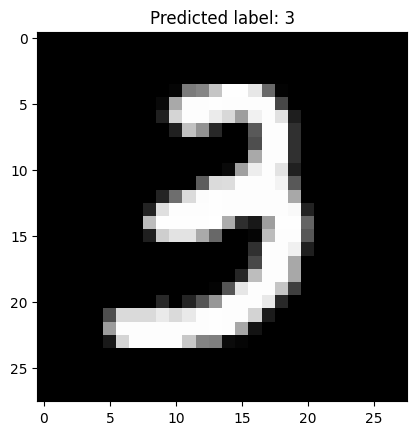

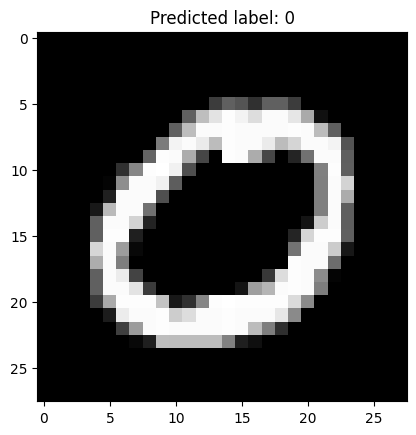

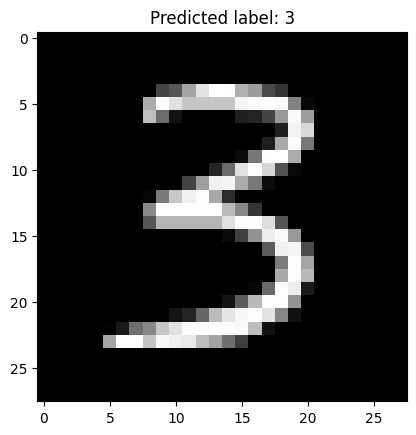

In [ ]:
# Defining the CNN model

model = Sequential()  # Sequential model

model.add(Conv2D(32, kernel_size=(3, 3), input_shape = (28, 28, 1)))    # The first input layer, is 2D, has 32 filters, and size is 3x3
model.add(Conv2D(32, kernel_size=(3, 3)))   # Adds another layer

model.add(MaxPooling2D(pool_size=(2, 2)))   # Max pooling layer which reduces the dimensions, size is 2x2

model.add(Conv2D(64, kernel_size=(3, 3)))   # Adds another convolutional layer with 64 filters, size is 3x3
model.add(Conv2D(64, kernel_size=(3, 3)))   # Adds anothe layer

model.add(MaxPooling2D(pool_size=(2, 2)))   # Max pooling layer which reduces the dimensions, size is 2x2

model.add(Flatten())    # Flattens to a 1D array
model.add(Dense(128, activation=tf.nn.relu))  # Dense/fully connected layer with 128 neurons with a ReLU activation function
model.add(Dropout(0.2))   # Dropout layer to avoid overfitting

model.add(Dense(10, activation=tf.nn.softmax))   # The last layer, which has 10 for the 10 class labels; softmax for probability distribution

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])   # Compiles the model with adam as the optimizer, and cross entropy loss
history = model.fit(x = x_train, y = y_train, epochs = 10)    # Trains model for 10 epochs

# Plotting loss
plt.figure(figsize=(7,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss when training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy when training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

# Doing predictions for the test data
cnn_predict = model.predict(x_test)

# Doing the conversion from probabilities to class labels
cnn_predict = np.argmax(cnn_predict, axis=1)

# Displaying the images with the predicted labels
for i in range(10):
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f'Predicted label: {cnn_predict[i]}')
  plt.show()


In [ ]:
# Load the data using pandas
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Splitting the data into input values and target values
x = train_data.drop(columns=['label']).values
y = train_data['label'].values

# Splitting the data into a training and a validation set using a 80:20 split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)   # Setting a value to random state makes sure the same splits of data occur

# Reshaping (-1, 28, 28, 1): -1 so the array can be calculated with the rest of the dimensions
# The 28, 28 refers to the height and width of the images (28 px)
# 1 is the number of channels, which is one since its grayscale
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0 # For normalizing, we divide by 255 since pixels range from 0 - 255 but we want it to be from 0 to 1

x_valid = x_valid.reshape(-1, 28, 28, 1) / 255.0


# Printing the number of images in the training set and validation set
print('Number of images within the training set: ', x_train.shape[0])
print('Number of images within validation set: ', x_valid.shape[0])

Number of images within the training set:  33600
Number of images within validation set:  8400


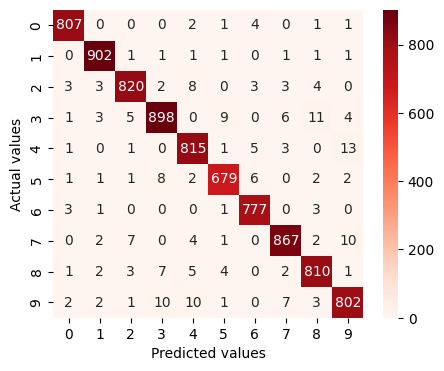

0 correctly classified: 807 / 816 (98.90%)
1 correctly classified: 902 / 909 (99.23%)
2 correctly classified: 820 / 846 (96.93%)
3 correctly classified: 898 / 937 (95.84%)
4 correctly classified: 815 / 839 (97.14%)
5 correctly classified: 679 / 702 (96.72%)
6 correctly classified: 777 / 785 (98.98%)
7 correctly classified: 867 / 893 (97.09%)
8 correctly classified: 810 / 835 (97.01%)
9 correctly classified: 802 / 838 (95.70%)
SVM Accuracy:  0.973452380952381


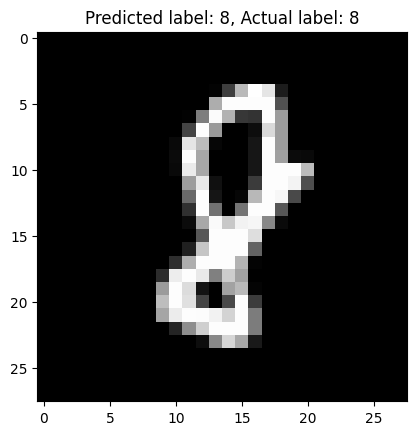

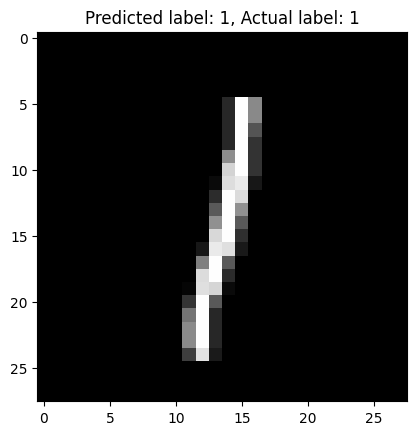

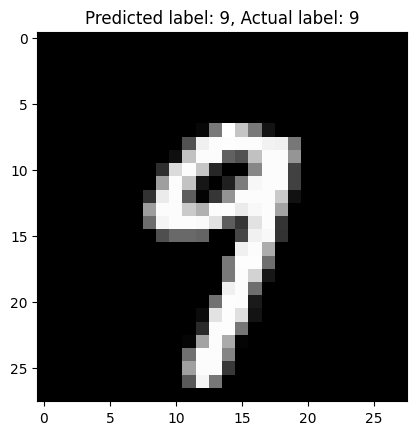

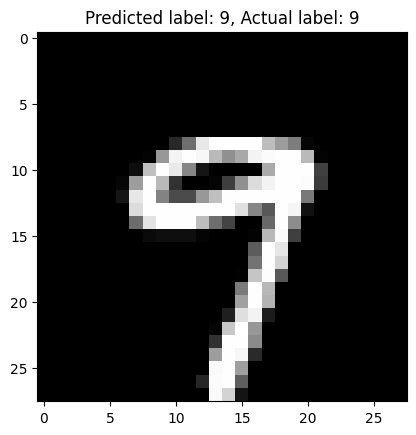

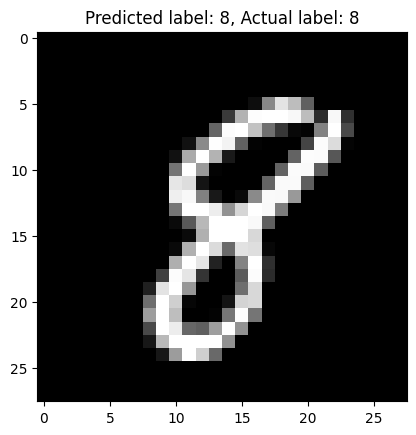

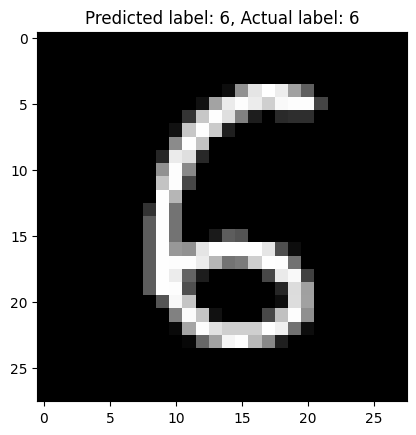

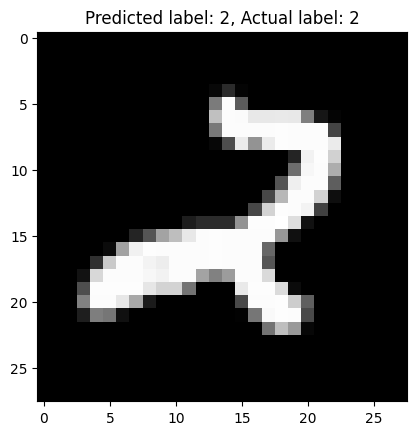

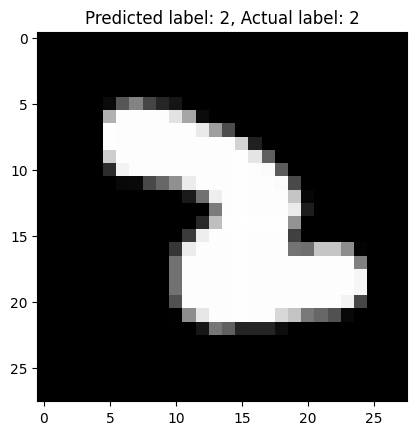

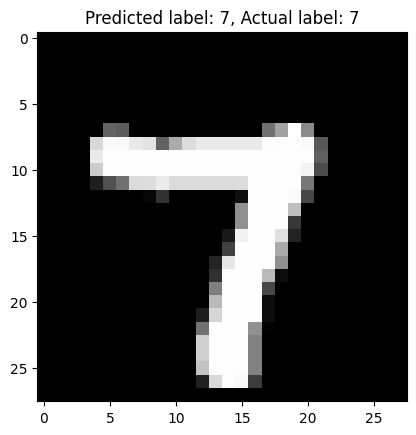

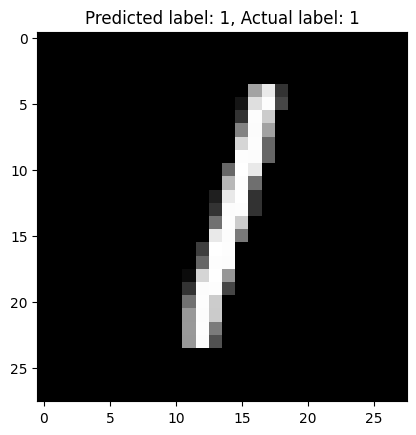

In [ ]:
# Flattening the data for SVM since it can't handle multidimensional data
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_valid_flattened = x_valid.reshape(x_valid.shape[0], -1)

# Training SVM
svm_classifier = svm.SVC()
svm_classifier.fit(x_train_flattened, y_train)

# Do predictions with SVM with validation data
svm_predict = svm_classifier.predict(x_valid_flattened)

# Computing the confusion matrix
svm_conmatrix = confusion_matrix(y_valid, svm_predict)

# Displaying the confusion matrix through a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(svm_conmatrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

# Prints out the number of correctly classified images
for i in range(10):
  correct_classifications = svm_conmatrix[i, i]
  total = np.sum(svm_conmatrix[i, :])
  print(f'{i} correctly classified: {correct_classifications} / {total} ({correct_classifications/total*100:.2f}%)')

# Compute the accuracy for SVM
svm_accuracy = accuracy_score(y_valid, svm_predict)
print('SVM Accuracy: ', svm_accuracy)

# Displaying the images with the predicted and actual labels
for i in range(10):
  plt.imshow(x_valid[i].reshape(28, 28), cmap='gray')
  plt.title(f'Predicted label: {svm_predict[i]}, Actual label: {y_valid[i]}')
  plt.show()


Epoch 1/10
1050/1050 [==============================] - 79s 73ms/step - loss: 0.1917 - accuracy: 0.9411
Epoch 2/10
1050/1050 [==============================] - 78s 74ms/step - loss: 0.0773 - accuracy: 0.9761
Epoch 3/10
1050/1050 [==============================] - 76s 73ms/step - loss: 0.0616 - accuracy: 0.9814
Epoch 4/10
1050/1050 [==============================] - 78s 74ms/step - loss: 0.0548 - accuracy: 0.9831
Epoch 5/10
1050/1050 [==============================] - 78s 74ms/step - loss: 0.0463 - accuracy: 0.9857
Epoch 6/10
1050/1050 [==============================] - 76s 72ms/step - loss: 0.0430 - accuracy: 0.9870
Epoch 7/10
1050/1050 [==============================] - 78s 74ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 8/10
1050/1050 [==============================] - 81s 77ms/step - loss: 0.0397 - accuracy: 0.9877
Epoch 9/10
1050/1050 [==============================] - 76s 72ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 10/10
263/263 [==============================] - 6s 24ms/s

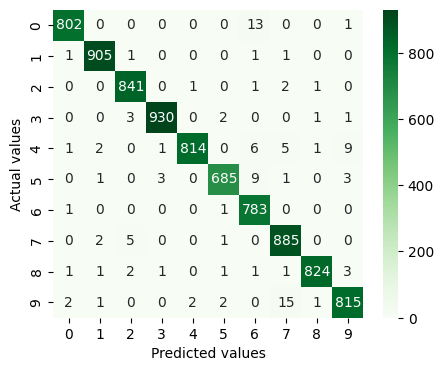

0 correctly classified: 802 / 816 (98.28%)
1 correctly classified: 905 / 909 (99.56%)
2 correctly classified: 841 / 846 (99.41%)
3 correctly classified: 930 / 937 (99.25%)
4 correctly classified: 814 / 839 (97.02%)
5 correctly classified: 685 / 702 (97.58%)
6 correctly classified: 783 / 785 (99.75%)
7 correctly classified: 885 / 893 (99.10%)
8 correctly classified: 824 / 835 (98.68%)
9 correctly classified: 815 / 838 (97.26%)
CNN Accuracy:  0.9861904761904762


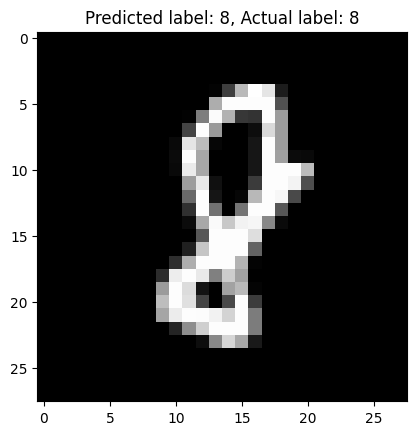

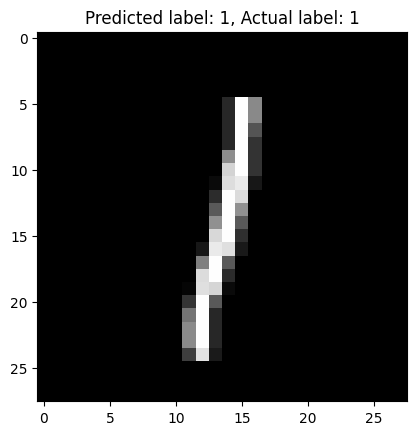

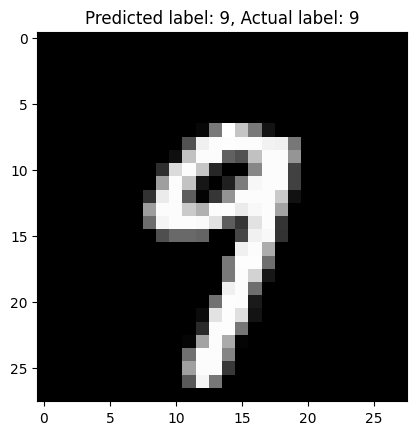

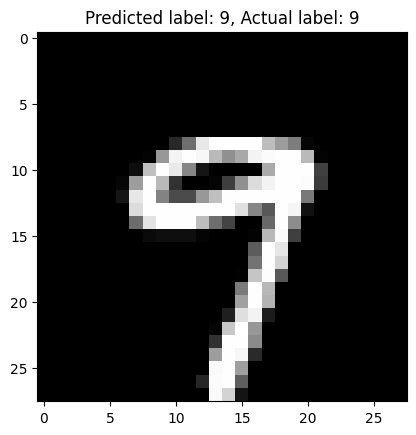

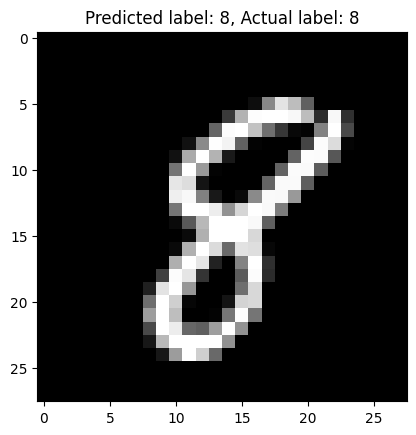

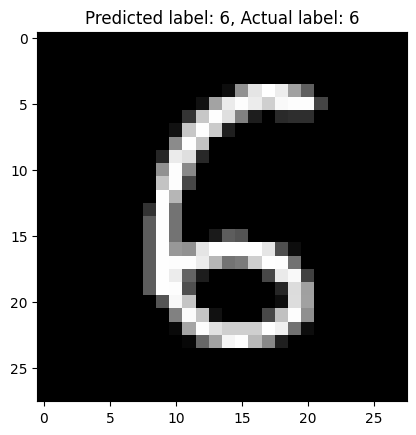

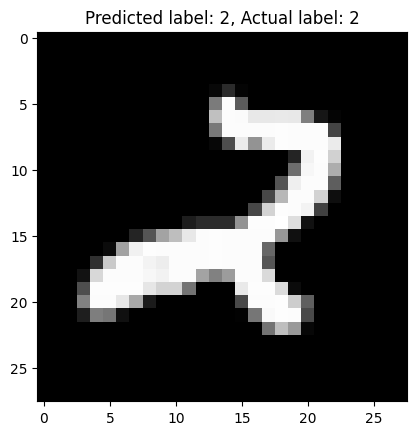

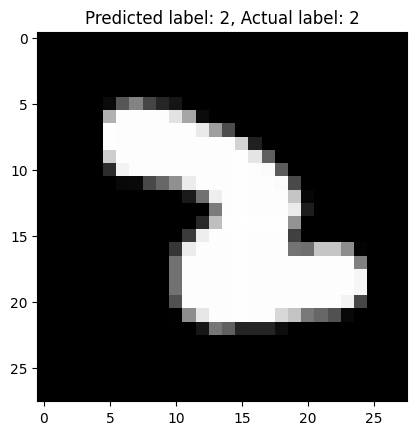

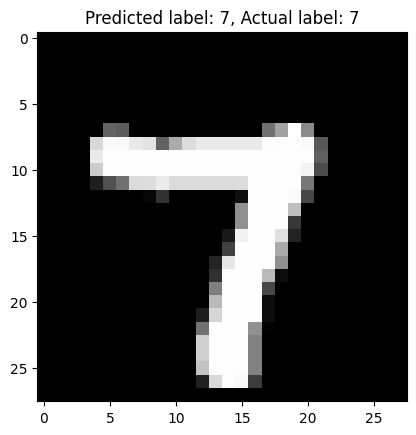

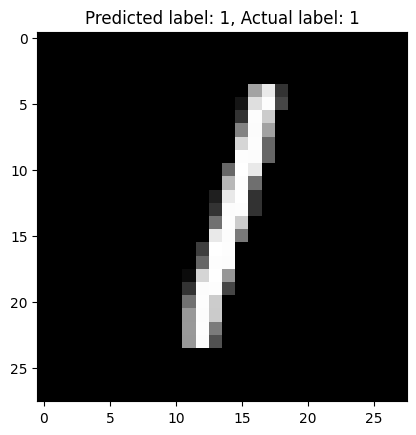

In [ ]:
# Defining the CNN model

model = Sequential()  # Sequential model

model.add(Conv2D(32, kernel_size=(3, 3), input_shape = (28, 28, 1)))    # The first input layer, is 2D, has 32 filters, and size is 3x3
model.add(Conv2D(32, kernel_size=(3, 3)))   # Adds another layer

model.add(MaxPooling2D(pool_size=(2, 2)))   # Max pooling layer which reduces the dimensions, size is 2x2

model.add(Conv2D(64, kernel_size=(3, 3)))   # Adds another convolutional layer with 64 filters, kernel size is 3x3
model.add(Conv2D(64, kernel_size=(3, 3)))   # Adds anothe layer

model.add(MaxPooling2D(pool_size=(2, 2)))   # Max pooling layer which reduces the dimensions, size is 2x2

model.add(Flatten())    # Flattens to a 1D array
model.add(Dense(128, activation=tf.nn.relu))  # Dense/fully connected layer with 128 neurons with a ReLU activation function
model.add(Dropout(0.2))   # Dropout layer to avoid overfitting

model.add(Dense(10, activation=tf.nn.softmax))   # The last layer, which has 10 for the 10 class labels; softmax for probability distribution

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])   # Compiles the model with adam as the optimizer, and cross entropy loss
model.fit(x = x_train, y = y_train, epochs = 10)    # Trains model for 10 epochs

# Doing predictions for the validation data
cnn_predict = model.predict(x_valid)

# Doing the conversion from probabilities to class labels
cnn_predict = np.argmax(cnn_predict, axis=1)

# Computing the confusion matrix for the CNN
cnn_conmatrix = confusion_matrix(y_valid, cnn_predict)

# Displaying the confusion matrix through a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cnn_conmatrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

# Prints out the number of correctly classified images
for i in range(10):
  correct_classification = cnn_conmatrix[i, i]
  total = np.sum(cnn_conmatrix[i, :])
  print(f'{i} correctly classified: {correct_classification} / {total} ({correct_classification/total*100:.2f}%)')

# Compute the accuracy for CNN
cnn_accuracy = accuracy_score(y_valid, cnn_predict)
print('CNN Accuracy: ', cnn_accuracy)

# Displaying the images with the predicted and actual labels
for i in range(10):
  plt.imshow(x_valid[i].reshape(28, 28), cmap='gray')
  plt.title(f'Predicted label: {cnn_predict[i]}, Actual label: {y_valid[i]}')
  plt.show()
